# Task 8 of Second Machine Learning Homework
## Effect of Model Complexity on Overfitting

**Dataset**: Use the following code to generate a dataset of 200 samples:

```py
np.random.seed(4)
X = np.random.uniform(-5, 5, 200)
epsilon = np.random.normal(0, 0.5, 200)
y = 2 * X**2 + X + epsilon
```

**Task**: Fit polynomial regression models of degrees 5 and 15 to the dataset. Plot the training and validation errors for both models.



### Generating dataset

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split

# Dataset generation
np.random.seed(4)
X = np.random.uniform(-5, 5, 200)
epsilon = np.random.normal(0, 0.5, 200)
y = 2 * X**2 + X + epsilon

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

### Polymonial regression function from task 5

In [14]:
import torch
import matplotlib.pyplot as plt

def train_polynomial_regression(X, y, degree=3, num_epochs=1000, lr=0.1, regularization_strength=0.0):
    class PolynomialRegressionModel(torch.nn.Module):
        def __init__(self, input_dim):
            super(PolynomialRegressionModel, self).__init__()
            self.poly = torch.nn.Linear(input_dim, 1)

        def forward(self, x):
            return self.poly(x)
        
    X_min, X_max = X.min(), X.max()
    X_scaled = (X - X_min) / (X_max - X_min)
    
    X_tensor = torch.tensor(X_scaled, dtype=torch.float32).view(-1, 1)
    y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)
    
    X_poly = torch.cat([X_tensor**i for i in range(1, degree + 1)], dim=1)

    model = PolynomialRegressionModel(degree)
    
    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    
    min_loss = float('inf')

    # Train
    for epoch in range(num_epochs):
        y_pred = model(X_poly)
        loss = criterion(y_pred, y_tensor)

        # Apply L2 regularization if regularization_strength > 0
        if regularization_strength > 0:
            reg_loss = sum(param.pow(2).sum() for param in model.parameters())
            loss += regularization_strength * reg_loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if loss.item() < min_loss:
            min_loss = loss.item()

        # Print the loss every 1000 epochs
        if (epoch + 1) % 1000 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

    return model, X_min, X_max, min_loss

### Train models and plot results

Epoch [1000/10000], Loss: 87.7694
Epoch [2000/10000], Loss: 56.1366
Epoch [3000/10000], Loss: 39.3456
Epoch [4000/10000], Loss: 30.3259
Epoch [5000/10000], Loss: 25.3781
Epoch [6000/10000], Loss: 22.5664
Epoch [7000/10000], Loss: 20.8778
Epoch [8000/10000], Loss: 19.7820
Epoch [9000/10000], Loss: 19.0015
Epoch [10000/10000], Loss: 18.3909
Epoch [1000/10000], Loss: 72.0028
Epoch [2000/10000], Loss: 56.8219
Epoch [3000/10000], Loss: 46.4809
Epoch [4000/10000], Loss: 38.5427
Epoch [5000/10000], Loss: 32.3629
Epoch [6000/10000], Loss: 27.5364
Epoch [7000/10000], Loss: 23.7573
Epoch [8000/10000], Loss: 20.7891
Epoch [9000/10000], Loss: 18.4491
Epoch [10000/10000], Loss: 16.5959


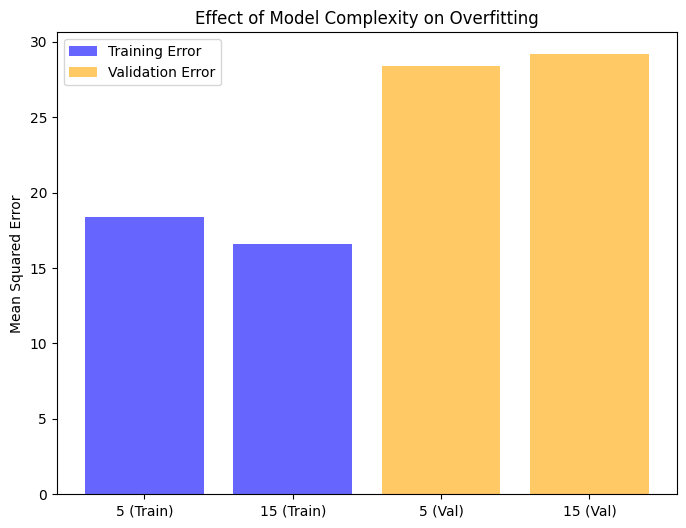

In [18]:
import matplotlib.pyplot as plt

# Training and validation function
def calculate_errors(X, y, model, degree, X_min, X_max):
    X_scaled = (X - X_min) / (X_max - X_min)
    X_tensor = torch.tensor(X_scaled, dtype=torch.float32).view(-1, 1)
    y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)
    
    X_poly = torch.cat([X_tensor**i for i in range(1, degree + 1)], dim=1)
    y_pred = model(X_poly).detach().numpy()
    mse = np.mean((y_pred - y_tensor.numpy())**2)
    return mse

# Train models and collect errors
degrees = [5, 15]
results = {}
for degree in degrees:
    model, X_min, X_max, _ = train_polynomial_regression(X_train, y_train, degree=degree, num_epochs=10000, lr=0.01, regularization_strength=0)
    train_error = calculate_errors(X_train, y_train, model, degree, X_min, X_max)
    val_error = calculate_errors(X_val, y_val, model, degree, X_min, X_max)
    results[degree] = (train_error, val_error)

# Plot training and validation errors
plt.figure(figsize=(8, 6))
degrees = list(results.keys())
train_errors = [results[d][0] for d in degrees]
val_errors = [results[d][1] for d in degrees]

plt.bar([str(d) + " (Train)" for d in degrees], train_errors, color='blue', alpha=0.6, label='Training Error')
plt.bar([str(d) + " (Val)" for d in degrees], val_errors, color='orange', alpha=0.6, label='Validation Error')

plt.ylabel('Mean Squared Error')
plt.title('Effect of Model Complexity on Overfitting')
plt.legend()
plt.show()


### Conclusions

We can see that both models are prone to overfitting (better accuracy on training data).
A model of higher complexity can overfit harder (interpolate data more accurately which
results in more overfitting), but as we can see those differences are not that big in our scenario.